# LAB 4: Clustering (Unsupervised learning)

## Part I : Exercises

### Exercise 1

In [1]:
import pandas
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
d = [0.3, 0.4, 0.7,0.5, 0.8,0.45] # d should be a condensed distance matrix, like an object returned by pdist() function

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.3, 0.3, 0.0],
  [0.0, 0.45, 0.45, 0.0],
  [0.3, 0.8, 0.8, 0.45]],
 'ivl': [1, 2, 3, 4],
 'leaves': [0, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

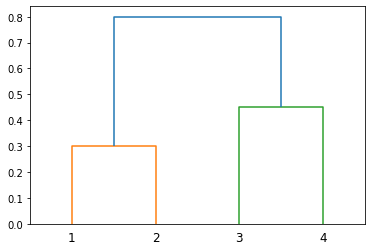

In [2]:
# a) complete linkage
exo1_hc_complete = linkage(d, "complete")
dendrogram(exo1_hc_complete,labels=[1,2,3,4])

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 0.3, 0.3, 0.0],
  [0.0, 0.4, 0.4, 0.3],
  [0.0, 0.45, 0.45, 0.4]],
 'ivl': [4, 3, 1, 2],
 'leaves': [3, 2, 0, 1],
 'color_list': ['C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1']}

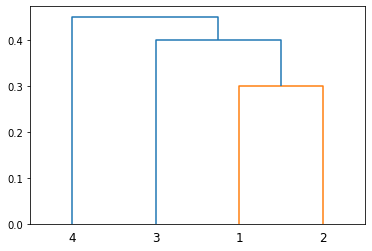

In [3]:
# b) complete single
exo1_hc_single = linkage(d, "single")
dendrogram(exo1_hc_single,labels=[1,2,3,4])

In [4]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(exo1_hc_complete, n_clusters = 2)) 
#c) (1,2), (3,4)
print(cut_tree(exo1_hc_single, n_clusters = 2)) 
#d) (1, 2, 3), (4)

[[0]
 [0]
 [1]
 [1]]
[[0]
 [0]
 [0]
 [1]]


In [5]:
column_labels = ["sub-cluster","sub-cluster","distance","cluster size"]
df = pandas.DataFrame(exo1_hc_complete, columns=column_labels)
print(df)

   sub-cluster  sub-cluster  distance  cluster size
0          0.0          1.0      0.30           2.0
1          2.0          3.0      0.45           2.0
2          4.0          5.0      0.80           4.0


In [6]:
print("JOINS")
#print("sub-clusters","distance","cluster size")
df = pandas.DataFrame(exo1_hc_single, columns=column_labels)
print(df)

JOINS
   sub-cluster  sub-cluster  distance  cluster size
0          0.0          1.0      0.30           2.0
1          2.0          4.0      0.40           3.0
2          3.0          5.0      0.45           4.0


In [7]:
exo1_hc_complete[:,2] # to get the distances in the order the joins took place

array([0.3 , 0.45, 0.8 ])

### Exercise 2

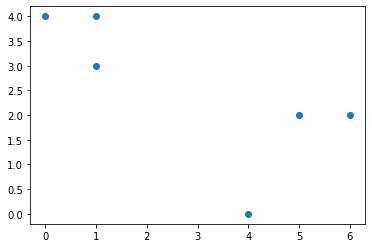

In [8]:
import matplotlib.pyplot as plt
X1 = [1, 1, 0, 5, 6, 4]
X2 = [4, 3, 4, 2, 2, 0]
#a)
plt.plot(X1,X2,"o")

In [9]:
#b)
from random import choice
l = [1, 2]  
labels = [choice(l) for x in range(0,len(X1))]
print(labels)

[2, 2, 1, 1, 1, 2]


In [10]:
#c) centroids
def calculate_centroids(X,labels):
    centroid1, centroid2,n1,n2=[0,0],[0,0],0,0
    for i in range(0,len(X[0])):
        if labels[i]==1:
            centroid1[0]+=X[0][i]
            centroid1[1]+=X[1][i]
            n1+=1
        else: 
            centroid2[0]+=X[0][i]
            centroid2[1]+=X[1][i]
            n2+=1
    centroid1[0]=centroid1[0]*1.0/n1
    centroid1[1]=centroid1[1]*1.0/n1
    centroid2[0]=centroid2[0]*1.0/n2
    centroid2[1]=centroid2[1]*1.0/n2
    return[centroid1,centroid2]
      
c1,c2 =calculate_centroids(X,labels)[0],calculate_centroids(X,labels)[1]
print(c1)
print(c2)

plt.plot(X1,X2,"o")
plt.plot(c1[0],c1[1],"*",color="black")
plt.plot(c2[0],c2[1],"*",color="black")

NameError: name 'X' is not defined

In [ ]:
#d
import math
def dist(x,centroid):
    return(math.sqrt((x[0] - centroid[0])**2 + (x[1]-centroid[1])**2))
dist([X1[0],X2[0]],centroid1)

2.5

In [ ]:
def assign_labels(X, centroid1, centroid2):
    labels = []
    for i in range(len(X[0])):
        if (dist([X[0][i],X[1][i]], centroid1) < dist([X[0][i],X[1][i]], centroid2)):
            labels.append(1)
        else:
            labels.append(2)
    return(labels)

X =[X1,X2]
labels = assign_labels(X, centroid1, centroid2)
print(labels)

[2, 2, 2, 1, 1, 1]


In [ ]:
#e)
last_labels = []
while (not(last_labels == labels)): 
    last_labels = labels
    centroid1 = calculate_centroids(X,labels)[0]
    centroid2 = calculate_centroids(X,labels)[1]
    print(centroid1)
    print(centroid2)
    labels = assign_labels(X, centroid1, centroid2)


[5.0, 1.3333333333333333]
[0.6666666666666666, 3.6666666666666665]


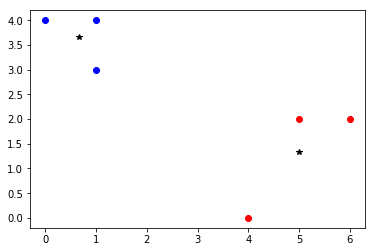

In [ ]:
for i in range(len(X[0])):
    if labels[i] ==1:
        col="red"
    else:
        col="blue"
    plt.plot(X[0][i],X[1][i],"o",color=col)
        
plt.plot(centroid1[0],centroid1[1],"*",color="black")
plt.plot(centroid2[0],centroid2[1],"*",color="black")